In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('datasets/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# Check for null values and data types
print(df.info())

# Statistical summary (mean, min, max)
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


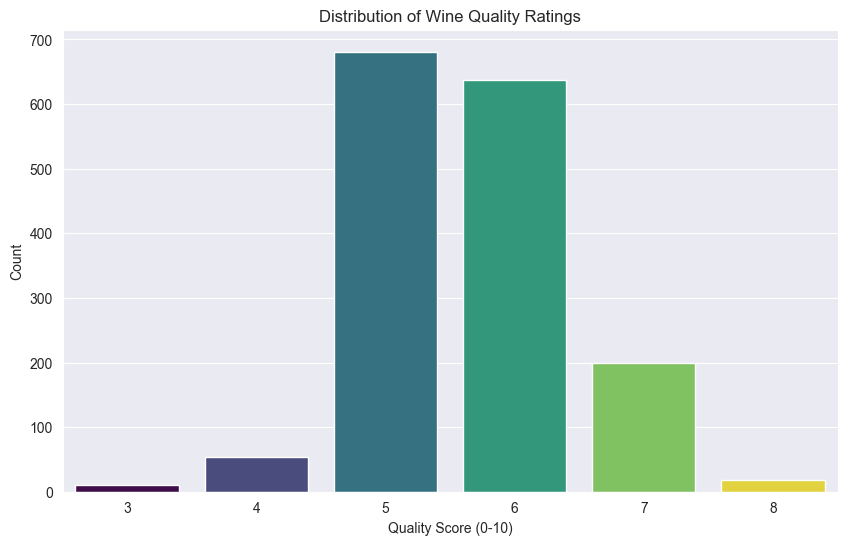

In [3]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, hue='quality', palette='viridis', legend=False)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Score (0-10)')
plt.ylabel('Count')
plt.show()

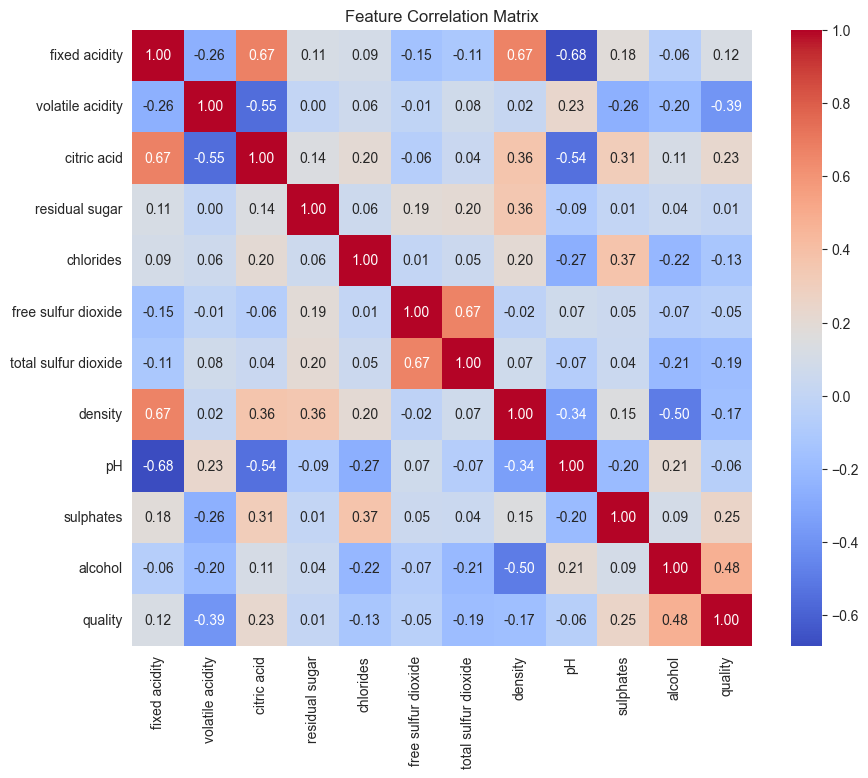

In [4]:
plt.figure(figsize=(10, 8))
# Calculate correlation matrix
corr = df.corr()
# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [5]:
# specific correlation with 'quality'
quality_corr = df.corr()['quality'].drop('quality')

# Sort by absolute value to see strength regardless of positive/negative
print(quality_corr.abs().sort_values(ascending=False))

alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64


#### Αρχικές παρατηρήσεις.
        - Η βαμολογία της ποιότητας των κρασιών παρουσιάζει κανονική κατανομή.
        - Τα features που παρουσιάζουν την ισχυρότερη συσχέτιση με το target (quality) είναι:
                - Alcohol (0.48)
                - Volatile Acidity (0.39)



#### Θα ελέγξουμε για null values. Σε περίπτωση που βρεθούν θα τις χειριστούμε αναλόγως.

In [6]:
# check for nulls
null_counts = df.isnull().sum()
print("Missing values per column:\n", null_counts[null_counts > 0])

Missing values per column:
 Series([], dtype: int64)


#### Δεν υπάρχουν null values.
    Επειδή το dataset είναι μικρό (1599 γραμμές), σε περίπτωση που υπήρχαν nulls, θα προτιμούσαμε να προχωρήσουμε συμπληρώνοντας τον
    μέσο όρο (mean imputation). Διαφορετικά, αν απλά διαγράφαμε κάποιες γραμμές (drop rows) υπήρχε ο κίνδυνος να χάσουμε χρήσιμη πληροφορία.

#### Στη συνέχεια θα κάνουμε κατανομή κλάσεων και θα ψάξουμε για τυχόν ανισορροπία δεδομένων.
    Αυτό γίνεται για να αποφύγουμε το "Accuracy Paradox", όπου αν το 95% των κρασιών είναι "μη ποιοτικά" και το υπόλοιπο 5% ποιοτικά,
    το μοντέλο μπορεί να πετύχει πολύ υψηλό accuracy (95%) απλά προβλέποντας "μη ποιοτικό" για όλα ανεξαιρέτως τα κρασιά!

#### Σε αυτό το σημείο παίρνουμε την απόφαση ότι θα ελέγξουμε για "ποιοτικό" ή "μη ποιοτικό" κρασί και για αυτό το λόγο θα θέσουμε κάποιο όριο.
    Θέτουμε  στο 7, το όριο απο το οποίο και πάνω κάθε κρασί θα θεωρείται ποιοτικό. Θα δημιουργήσουμε ένα νέο  feature που θα παίρνει boolean τιμές, για να
    καταγράψουμε αυτό το δεδομένο.

Class Counts:
 good_quality
0    1382
1     217
Name: count, dtype: int64

Percentage of 'Good' wines: 13.57%


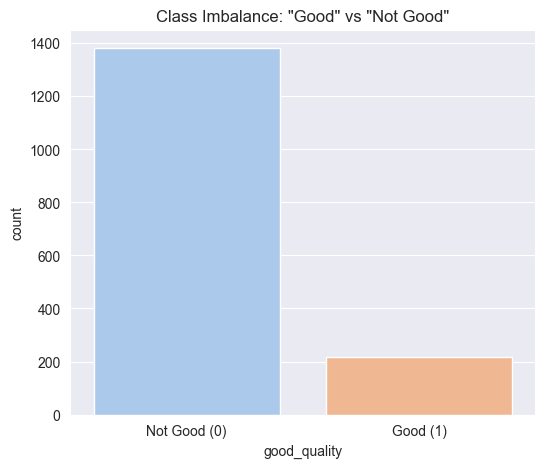

In [7]:
# 1. Create a binary target: 1 if Quality >= 7 (Good), else 0 (Not Good)
df['good_quality'] = [1 if x >= 7 else 0 for x in df['quality']]

# 2. Check the distribution
counts = df['good_quality'].value_counts()
print("Class Counts:\n", counts)

# Calculate percentage
percentage_good = (counts[1] / len(df)) * 100
print(f"\nPercentage of 'Good' wines: {percentage_good:.2f}%")

# 3. Visualize the imbalance
plt.figure(figsize=(6, 5))
sns.countplot(x='good_quality', data=df, hue='good_quality', palette='pastel', legend=False)
plt.xticks([0, 1], ['Not Good (0)', 'Good (1)'])
plt.title('Class Imbalance: "Good" vs "Not Good"')
plt.show()

#### Παρατηρούμε σημαντική ανισορροπία στα δεδομένα μας. Μόνο το 13.6 % ανήκει στα ποιοτικά κρασιά (σύμφωνα με τον κανόνα που οι ίδιοι θέσαμε).
    Θα πρέπει να κάνουμε δοκιμές για να βρούμε ποιό είδος SVM ταιριάζει καλύτερα.

#### Αρχικά θα χωρίσουμε το dataset σε train και test και θα κάνουμε scale τις τιμές γιατί ο SVM είναι distance based algorithm.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Define Features (X) and Target (y)
# We drop 'quality' (original score) and 'good_quality' (target)X = df.drop(['quality', 'good_quality'], axis=1)
y = df['good_quality']

# 2. Split the data (80% Training, 20% Testing)
# random_state=42 ensures we get the same split every time we run this
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the data (Mandatory for SVMs)
scaler = StandardScaler()

# Fit on training set ONLY, then transform both
# This prevents "data leakage" (the model shouldn't know the stats of the test set)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Data split and scaled successfully.")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples:  {X_test.shape[0]}")

✅ Data split and scaled successfully.
Training samples: 1279
Testing samples:  320


In [9]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# --- 1. Weighted SVM ---
# class_weight='balanced' automatically calculates weights inversely proportional to class frequencies
svm_weighted = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_svm = svm_weighted.predict(X_test)

print("--- Weighted SVM Results ---")
print(classification_report(y_test, y_pred_svm))

# --- 2. Weighted Decision Tree ---
tree_weighted = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
tree_weighted.fit(X_train, y_train)
y_pred_tree = tree_weighted.predict(X_test)

print("\n--- Weighted Decision Tree Results ---")
print(classification_report(y_test, y_pred_tree))

--- Weighted SVM Results ---
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       273
           1       0.48      0.94      0.63        47

    accuracy                           0.84       320
   macro avg       0.73      0.88      0.77       320
weighted avg       0.91      0.84      0.86       320


--- Weighted Decision Tree Results ---
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       273
           1       0.39      0.87      0.54        47

    accuracy                           0.78       320
   macro avg       0.68      0.82      0.70       320
weighted avg       0.89      0.78      0.81       320

